# Clustering & Classification

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Download the dataset
# Load the dataset

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Perform below Visualizations

# Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

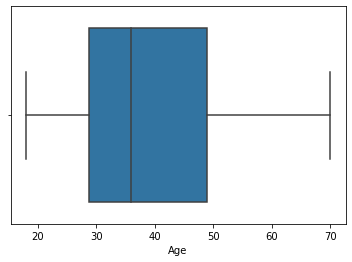

In [5]:
sns.boxplot(data['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

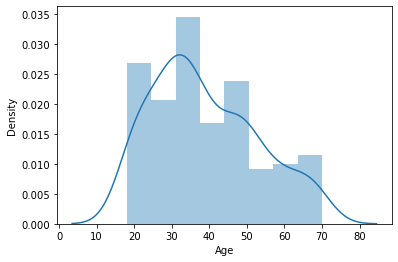

In [7]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

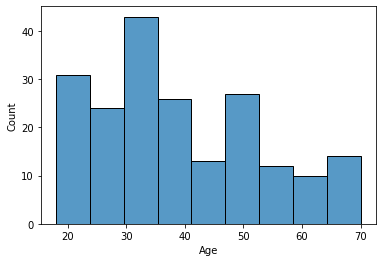

In [8]:
sns.histplot(data['Age'])

# Bi-Variate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Age'>

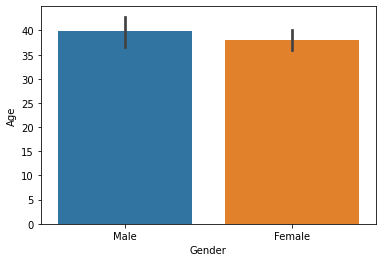

In [9]:
sns.barplot(data['Gender'],data['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

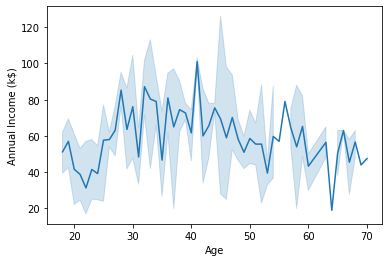

In [10]:
sns.lineplot(data['Age'],data['Annual Income (k$)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

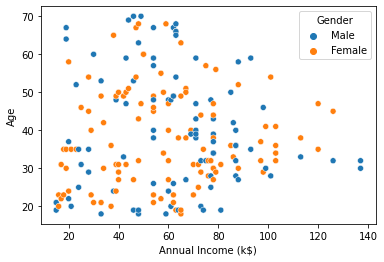

In [11]:
sns.scatterplot(data['Annual Income (k$)'],data['Age'],hue =data['Gender'])

# Multi-Variate Analysis

In [12]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

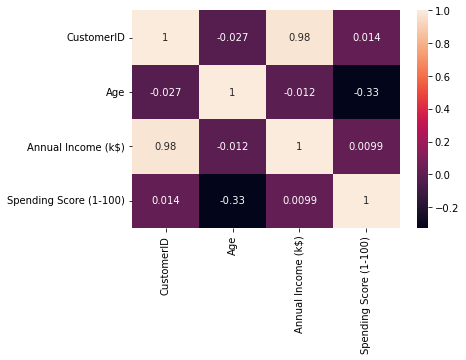

In [13]:
sns.heatmap(data.corr(),annot=True)

# Perform descriptive statistics on the dataset

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Check for Missing values and deal with them

In [16]:
data.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# Find the outliers and replace them outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

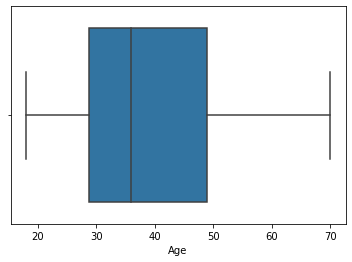

In [17]:
sns.boxplot(data['Age'])

# Check for Categorical columns and perform encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


# Scaling the data

In [19]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # between 0 and 1
data_scaled=mm.fit_transform(data)
data_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

# Perform any of the clustering algorithms

In [21]:
from sklearn.cluster import KMeans
km = KMeans()
clus = km.fit_predict(data_scaled)
clus

array([1, 1, 4, 4, 4, 4, 6, 4, 2, 4, 2, 4, 6, 4, 5, 1, 4, 1, 2, 4, 1, 1,
       6, 1, 6, 1, 6, 1, 6, 4, 2, 4, 2, 1, 6, 4, 6, 4, 6, 4, 6, 1, 2, 4,
       6, 4, 6, 4, 4, 4, 6, 1, 4, 2, 6, 2, 6, 2, 4, 2, 2, 1, 6, 6, 2, 1,
       6, 6, 1, 4, 2, 6, 6, 6, 2, 1, 6, 1, 4, 6, 2, 1, 2, 6, 4, 2, 6, 4,
       4, 6, 6, 1, 2, 6, 4, 1, 6, 4, 2, 1, 4, 6, 2, 1, 2, 4, 6, 2, 2, 2,
       2, 4, 6, 1, 4, 4, 6, 6, 6, 6, 1, 6, 7, 3, 4, 7, 5, 3, 2, 3, 5, 3,
       4, 7, 5, 7, 0, 3, 5, 7, 0, 3, 4, 7, 5, 3, 2, 7, 0, 3, 5, 3, 0, 7,
       0, 7, 5, 7, 5, 7, 0, 7, 5, 7, 5, 7, 5, 7, 0, 3, 5, 3, 5, 3, 0, 7,
       2, 3, 2, 3, 0, 7, 5, 7, 0, 3, 0, 3, 0, 7, 0, 7, 5, 7, 0, 7, 0, 3,
       5, 3])

In [22]:
names = data.columns
names

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [23]:
data1= pd.DataFrame(data_scaled,columns = names)
data1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


# Add the cluster data with the primary dataset

In [24]:
data1['kclus']  = pd.Series(clus)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,1
1,1.0,0.057692,0.000000,0.816327,1
2,0.0,0.038462,0.008197,0.051020,4
3,0.0,0.096154,0.008197,0.775510,4
4,0.0,0.250000,0.016393,0.397959,4


In [25]:
data1['kclus'].unique()

array([1, 4, 6, 2, 5, 7, 3, 0])

In [26]:
data1['kclus'].value_counts()

6    38
4    37
2    29
1    24
7    22
3    18
5    17
0    15
Name: kclus, dtype: int64

# Split the data into dependent and independent variables

In [27]:
x = data1.iloc[:,0:4]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [28]:
y = data1.iloc[:,4:]
y

,kclus
0,1
1,1
2,4
3,4
4,4
...,...
195,7
196,0
197,3
198,5


# Split the data into training and testing

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.409836,0.428571
67,0.0,0.961538,0.270492,0.479592
78,0.0,0.096154,0.319672,0.520408
42,1.0,0.576923,0.196721,0.357143
17,1.0,0.038462,0.049180,0.663265
...,...,...,...,...
133,0.0,0.250000,0.467213,0.714286
137,1.0,0.269231,0.475410,0.734694
72,0.0,0.807692,0.286885,0.489796
140,0.0,0.750000,0.491803,0.040816


In [30]:
x_train.shape

(140, 4)

In [31]:
x_test

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.254098,0.510204
40,0.0,0.903846,0.188525,0.346939
34,0.0,0.596154,0.147541,0.132653
102,1.0,0.942308,0.385246,0.591837
184,0.0,0.442308,0.688525,0.387755
198,1.0,0.269231,1.000000,0.173469
95,1.0,0.115385,0.368852,0.520408
4,0.0,0.250000,0.016393,0.397959
29,0.0,0.096154,0.114754,0.877551
168,0.0,0.346154,0.590164,0.265306


In [32]:
x_test.shape

(60, 4)

In [33]:
y_train

,kclus
116,6
67,6
78,4
42,2
17,1
...,...
133,7
137,3
72,6
140,0


In [34]:
y_test

,kclus
58,4
40,6
34,6
102,2
184,0
198,5
95,1
4,4
29,4
168,0


# Build the Model
# Train the Model
# Test the Model
# Measure the performance using Metrics

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [36]:
pred_test = lr.predict(x_test)
pred_test

array([[4.52683084],
       [4.94707512],
       [4.29637138],
       [3.13830434],
       [5.02165009],
       [2.44844293],
       [2.20721508],
       [4.21708422],
       [4.85196399],
       [4.6578007 ],
       [2.82985998],
       [2.11225887],
       [5.1789307 ],
       [4.97981171],
       [3.0048796 ],
       [5.02361159],
       [5.15426103],
       [4.75636368],
       [4.4060928 ],
       [2.55890833],
       [2.35695717],
       [4.24960118],
       [4.54915244],
       [4.59607446],
       [4.61521213],
       [1.58042755],
       [4.25864957],
       [4.34652308],
       [5.8401741 ],
       [2.30187438],
       [4.42165996],
       [5.35095394],
       [4.95694679],
       [2.73008897],
       [2.51866803],
       [4.61969905],
       [4.76111762],
       [5.25484657],
       [4.57762592],
       [2.02153552],
       [2.92870857],
       [2.70849368],
       [5.63694455],
       [1.56962853],
       [4.95011926],
       [5.1949209 ],
       [4.45858164],
       [4.679

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(pred_test,y_test)
mse

3.528826163310276

In [38]:
rmse = np.sqrt(mse)
rmse

1.878517011717029

In [39]:
mae = mean_absolute_error(pred_test,y_test)
mae

1.3713074062394621

In [40]:
from sklearn.metrics import accuracy_score
acc = lr.score(x_test,y_test)
acc

0.1487688161406464